<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/m6CV/d8/sol/mnistownhandwritingOpencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
eight = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/eight.png')
three = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/three.png')
four = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/four.png')
five = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/five.png')
six = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/six.png')
seven = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/seven.png')
nine = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/nine.png')
one = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/one.png')
two = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/two.png')


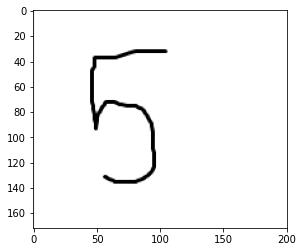

In [ ]:
plt.imshow(five)

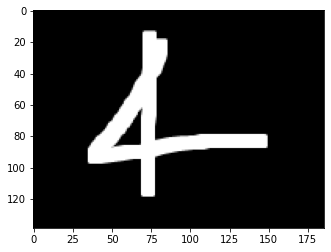

In [ ]:
fourone = four.copy()
kernel = np.ones((7,7))
fourone = cv2.bitwise_not(fourone)
fourone = cv2.cvtColor(fourone, cv2.COLOR_BGR2RGB)
closing = cv2.morphologyEx(fourone,cv2.MORPH_DILATE,kernel,)
plt.imshow(closing)

In [ ]:
def mnist(img):
    img1 = img.copy()
    #_, img = cv2.threshold(img, 150, 255, cv2.THRESH_TRUNC)
    img1 = cv2.bitwise_not(img1)
    
    kernel = np.ones((7,7), np.uint8)
    img1  = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    img1  = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
    img1 = cv2.dilate(img1, kernel) # two thicken the hand writing
    #closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel,)
    #_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    #img = cv2.GaussianBlur(img, (5,5),0) # no need it i guess
    closing = cv2.morphologyEx(img1,cv2.MORPH_CLOSE,kernel,)
    img1 = cv2.resize(closing, (28, 28), interpolation=cv2.INTER_LINEAR) # the size of mnist is 28x28
    
    return img1

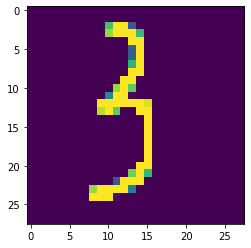

In [ ]:
plt.imshow(mnist(three))

In [ ]:
mnist(three).shape

(28, 28)

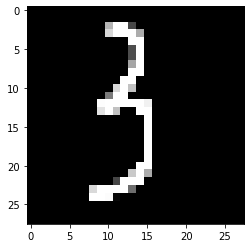

In [ ]:
threeone = three.copy()
img = cv2.bitwise_not(threeone)

#img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img = cv2.GaussianBlur(img, (5,5),0)
img = cv2.dilate(img, kernel)
img = cv2.resize(img, (28, 28))
plt.imshow(img)

In [ ]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd


import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch.utils.data import  DataLoader


In [ ]:
from torchsummary import summary

In [ ]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
#testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
#testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
class Network(nn.Module):
    
    # 
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 255)
        self.fc2 = nn.Linear(255, 90)
        self.fc3 = nn.Linear(90, 10)
        self.drop = nn.Dropout(p = 0.25)
        
    # Forward pass through the network, returns the output logits
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        #x = self.drop(x)
        x = F.softmax(x, dim=1)
        return x

model = Network()

In [ ]:
summary(model,(1,28,28))

In [ ]:
summary(model1,(1,28,28))

In [ ]:
los = nn.CrossEntropyLoss()
los

CrossEntropyLoss()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001,betas =(0.8, 0.999))
#optimizer = optim.SGD(model.parameters(),lr = 0.001,momentum=1)

In [ ]:
epochs = 10
learning_rate = 0.001
decay_rate = learning_rate / epochs
#optimizer = optim.Adagrad(model.parameters(),lr = learning_rate)
print_every = 184

for e in range(epochs):
    running_loss = 0
    print(f"Epoch: {e+1}/{epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):

        # Flatten MNIST images into a 784 long vector
        
        images.resize_(images.size()[0], 784)
        optimizer.zero_grad()
        
        output = model.forward(images)   # 1) Forward pass
        losss = los(output, labels) # 2) Compute loss
        losss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += losss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/len(trainloader):.3f}")
            running_loss = 0

In [ ]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

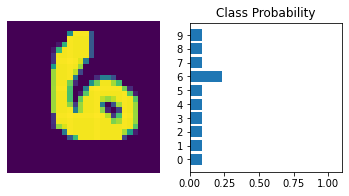

In [ ]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), ps)

In [ ]:
#three = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/three.png')
#four = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/four.png')

In [ ]:
three_mnist= mnist(three)

In [ ]:
three_mnist.shape

(28, 28)

In [ ]:
def to_tensor(arr: np.ndarray):
    tens = torch.from_numpy(arr).float()
    tensorr = F.normalize(tens)
    tensorr = tensorr.reshape(1,28*28)
   
    return tensorr

In [ ]:
three_mnist = to_tensor(three_mnist)

In [ ]:
three_mnist.shape

torch.Size([1, 784])

In [ ]:
#model.train()

Network(
  (fc1): Linear(in_features=784, out_features=255, bias=True)
  (fc2): Linear(in_features=255, out_features=90, bias=True)
  (fc3): Linear(in_features=90, out_features=10, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
)

In [ ]:
with torch.no_grad():

    logitt = model(three_mnist)
    
    pred3 = torch.exp(logitt)
    pred3 = F.softmax(pred3, dim=1)

In [ ]:
pred3


tensor([[0.0687, 0.3811, 0.0687, 0.0688, 0.0688, 0.0688, 0.0687, 0.0688, 0.0687,
         0.0688]])

In [ ]:
torch.argmax(pred3).item()

1

In [ ]:
four_mnist= mnist(four)

In [ ]:
four_mnist = to_tensor(four_mnist)

In [ ]:
four_mnist.shape

torch.Size([1, 784])

In [ ]:
with torch.no_grad():
    logitt = model(four_mnist)
    
    #pred4 = torch.exp(logitt)
    ps = F.softmax(logitt, dim=1)
    
    

In [ ]:
ps

tensor([[0.1200, 0.0891, 0.0891, 0.0891, 0.1494, 0.0891, 0.1069, 0.0891, 0.0891,
         0.0891]])

In [ ]:
ps.argmax(dim=1).item()

4

In [ ]:
five_mnist= mnist(five)

In [ ]:
five_mnist = to_tensor(five_mnist)

In [ ]:
with torch.no_grad():
    logit5 = model(five_mnist)
    
    ps5 = torch.exp(logit5)
    ps5 = F.softmax(ps5, dim=1)
    
    

In [ ]:
ps5.argmax(dim=1).item()

8

In [ ]:
six_mnist= mnist(six)

In [ ]:
six_mnist = to_tensor(six_mnist)

In [ ]:
with torch.no_grad():
    logit6 = model(six_mnist)
    
    ps6 = torch.exp(logit6)
    ps6 = F.softmax(ps6, dim=1)
    
    

In [ ]:
ps6.argmax(dim=1).item()

8

In [ ]:
seven_mnist= mnist(seven)

In [ ]:
seven_mnist = to_tensor(seven_mnist)

In [ ]:
with torch.no_grad():
    logit7 = model(seven_mnist)
    
    ps7 = torch.exp(logit7)
    ps7 = F.softmax(ps7, dim=1)
    
    

In [ ]:
ps7.argmax(dim=1).item()

1

In [ ]:
eight_mnist= mnist(eight)
eight_mnist = to_tensor(eight_mnist)
with torch.no_grad():
    logit8 = model(eight_mnist)
    
    ps8 = torch.exp(logit8)
    ps8 = F.softmax(ps8, dim=1)
    
ps8.argmax(dim=1).item()
    

3

In [ ]:
nine_mnist= mnist(nine)
nine_mnist = to_tensor(nine_mnist)
with torch.no_grad():
    logit9 = model(nine_mnist)
    
    ps9 = torch.exp(logit9)
    ps9 = F.softmax(ps9, dim=1)
    
ps9.argmax(dim=1).item()
    

3

In [ ]:
from collections import OrderedDict
from torch import nn, optim
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch
from torchsummary import summary

In [ ]:
train_transforms = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST(root = './datasets', train=True, download = True, transform = train_transforms)
trainloader = DataLoader(train_data,shuffle=True, batch_size = 64)

test_data = datasets.MNIST('./datasets', download = True, transform = test_transforms)
testloader = DataLoader(test_data, batch_size = 64)


In [ ]:
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  datasets.MNIST('/files/', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  datasets.MNIST('/files/', train=False, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [ ]:
print(len(train_loader))

938


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model1 = Net()
            

In [ ]:
image, label =  next(iter(train_data))
img = image.numpy().transpose(2,1,0)
plt.imshow(img, cmap = 'gray')

In [ ]:
images, labels = next(iter(train_data))
img = images.numpy().transpose(1,2,0)
plt.imshow(img)

In [ ]:
class Nett(nn.Module):
    def __init__(self):
        super(Nett, self).__init__()
        self.conv1 = nn.Conv2d(1, 28, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(28, 16, 5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x
model2 = Nett()
summary(model2,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 28, 24, 24]             728
         MaxPool2d-2           [-1, 28, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]          11,216
         MaxPool2d-4             [-1, 16, 4, 4]               0
            Linear-5                  [-1, 120]          30,840
            Linear-6                   [-1, 84]          10,164
            Linear-7                    [-1, 2]             170
Total params: 53,118
Trainable params: 53,118
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.17
Params size (MB): 0.20
Estimated Total Size (MB): 0.37
----------------------------------------------------------------


In [ ]:
train_losses = []
train_counter = []
test_losses = []


def train(epoch):
  model1.train()
  for batch_idx, (data, target) in enumerate(train_loader):

    optimizer.zero_grad()
    output = model1(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleConv().to(device)

In [ ]:
epochs = 5
log_interval = 40

In [ ]:
for epoch in range(1, epochs + 1):
  train(epoch)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.289413
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.283754
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.332263
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.301275
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.292137
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.315193
Train Epoch: 1 [15360/60000 (26%)]	Loss: 2.323336
Train Epoch: 1 [17920/60000 (30%)]	Loss: 2.305922
Train Epoch: 1 [20480/60000 (34%)]	Loss: 2.302465
Train Epoch: 1 [23040/60000 (38%)]	Loss: 2.349640
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.348797
Train Epoch: 1 [28160/60000 (47%)]	Loss: 2.333071
Train Epoch: 1 [30720/60000 (51%)]	Loss: 2.305110
Train Epoch: 1 [33280/60000 (55%)]	Loss: 2.327560
Train Epoch: 1 [35840/60000 (60%)]	Loss: 2.306401
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.349560
Train Epoch: 1 [40960/60000 (68%)]	Loss: 2.314940
Train Epoch: 1 [43520/60000 (72%)]	Loss: 2.272300
Train Epoch: 1 [46080/60000 (77%)]	Loss: 2.266722
Train Epoch: 1 [48640/60000 (81%)]	Loss: 2.328950
Train Epoc

In [ ]:
def to_tensorr(arr: np.ndarray):
    tens = torch.from_numpy(arr).float()
    tensorr = F.normalize(tens)
    tensorr = tensorr.reshape(5,-1)
   
    return tensorr

In [ ]:
nine_mnist= mnist(nine)
nine_mnist = to_tensorr(nine_mnist)

RuntimeError: ignored

In [ ]:
nine_mnist= mnist(nine)
nine_mnist = to_tensor(nine_mnist)
with torch.no_grad():
    logit9 = model1(nine_mnist)
    
    ps9 = torch.exp(logit9)
    ps9 = F.softmax(ps9, dim=1)
    
ps9.argmax(dim=1).item()
    

RuntimeError: ignored

In [ ]:
#

ValueError: ignored